In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, LinearRegression, BayesianRidge

In [135]:
train_df=pd.read_csv('train.csv', parse_dates=['date'])
original_train_df = train_df.copy()
test_df=pd.read_csv('test.csv', parse_dates=['date'])

In [19]:
def val_count_df(df, column_name, sort_by_column_name=False):
    value_count = df[column_name].value_counts().reset_index().rename(columns={column_name:"Value Count","index":column_name}).set_index(column_name)
    value_count["Percentage"] = df[column_name].value_counts(normalize=True)*100
    value_count = value_count.reset_index()
    if sort_by_column_name:
        value_count = value_count.sort_values(column_name)
    return value_count

In [20]:
def plot_and_display_valuecounts(df, column_name, sort_by_column_name=False):
    val_count = val_count_df(df, column_name, sort_by_column_name)
    val_count.set_index(column_name).plot.pie(y="Value Count", figsize=(5,5), legend=False, ylabel="");

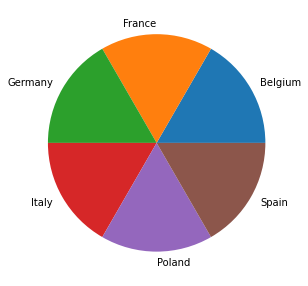

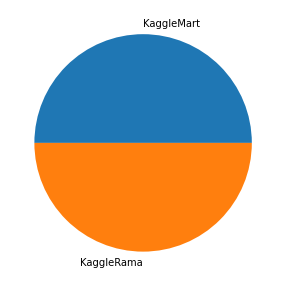

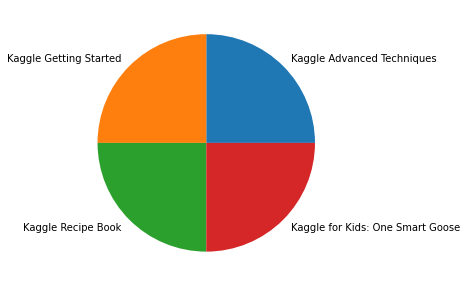

In [23]:
plot_and_display_valuecounts(train_df, "country")
plot_and_display_valuecounts(train_df, "store")
plot_and_display_valuecounts(train_df, "product")

In [31]:
train_df.groupby(["country","store","product"])["num_sold"].count()

country  store       product                         
Belgium  KaggleMart  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                     Kaggle for Kids: One Smart Goose    1461
         KaggleRama  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                     Kaggle for Kids: One Smart Goose    1461
France   KaggleMart  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                     Kaggle for Kids: One Smart Goose    1461
         KaggleRama  Kaggle Advanced Techniques          1461
                     Kaggle Getting Started              1461
                     Kaggle Recipe Book                  1461
                

In [36]:
print("Train - Earliest date:", train_df["date"].min())
print("Train - Latest date:", train_df["date"].max())

print("Test - Earliest date:", test_df["date"].min())
print("Test - Latest date:", test_df["date"].max())

Train - Earliest date: 2017-01-01 00:00:00
Train - Latest date: 2020-12-31 00:00:00
Test - Earliest date: 2021-01-01 00:00:00
Test - Latest date: 2021-12-31 00:00:00


In [37]:
weekly_df = train_df.groupby(["country","store", "product", pd.Grouper(key="date", freq="W")])["num_sold"].sum().rename("num_sold").reset_index()
monthly_df = train_df.groupby(["country","store", "product", pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()
display(monthly_df, weekly_df)

country       store                           product       date  \
0     Belgium  KaggleMart        Kaggle Advanced Techniques 2017-01-01   
1     Belgium  KaggleMart        Kaggle Advanced Techniques 2017-02-01   
2     Belgium  KaggleMart        Kaggle Advanced Techniques 2017-03-01   
3     Belgium  KaggleMart        Kaggle Advanced Techniques 2017-04-01   
4     Belgium  KaggleMart        Kaggle Advanced Techniques 2017-05-01   
...       ...         ...                               ...        ...   
2299    Spain  KaggleRama  Kaggle for Kids: One Smart Goose 2020-08-01   
2300    Spain  KaggleRama  Kaggle for Kids: One Smart Goose 2020-09-01   
2301    Spain  KaggleRama  Kaggle for Kids: One Smart Goose 2020-10-01   
2302    Spain  KaggleRama  Kaggle for Kids: One Smart Goose 2020-11-01   
2303    Spain  KaggleRama  Kaggle for Kids: One Smart Goose 2020-12-01   

      num_sold  
0        13345  
1        12556  
2        14137  
3        14575  
4        14338  
...        ...  
2299      4578  
2300      4254  
2301      4644  
2302      4437  
2303      5033  

[2304 rows x 5 columns]

country       store                           product       date  \
0      Belgium  KaggleMart        Kaggle Advanced Techniques 2017-01-01   
1      Belgium  KaggleMart        Kaggle Advanced Techniques 2017-01-08   
2      Belgium  KaggleMart        Kaggle Advanced Techniques 2017-01-15   
3      Belgium  KaggleMart        Kaggle Advanced Techniques 2017-01-22   
4      Belgium  KaggleMart        Kaggle Advanced Techniques 2017-01-29   
...        ...         ...                               ...        ...   
10075    Spain  KaggleRama  Kaggle for Kids: One Smart Goose 2020-12-06   
10076    Spain  KaggleRama  Kaggle for Kids: One Smart Goose 2020-12-13   
10077    Spain  KaggleRama  Kaggle for Kids: One Smart Goose 2020-12-20   
10078    Spain  KaggleRama  Kaggle for Kids: One Smart Goose 2020-12-27   
10079    Spain  KaggleRama  Kaggle for Kids: One Smart Goose 2021-01-03   

       num_sold  
0           663  
1          3362  
2          2757  
3          2863  
4          2924  
...         ...  
10075      1015  
10076      1181  
10077      1023  
10078      1065  
10079       895  

[10080 rows x 5 columns]

In [38]:
def plot_all(df):
    f,axes = plt.subplots(2,2,figsize=(20,15), sharex = True, sharey=True)
    f.tight_layout()
    for n,prod in enumerate(df["product"].unique()):
        plot_df = df.loc[df["product"] == prod]
        sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store",ax=axes[n//2,n%2])
        axes[n//2,n%2].set_title("Product: "+str(prod))

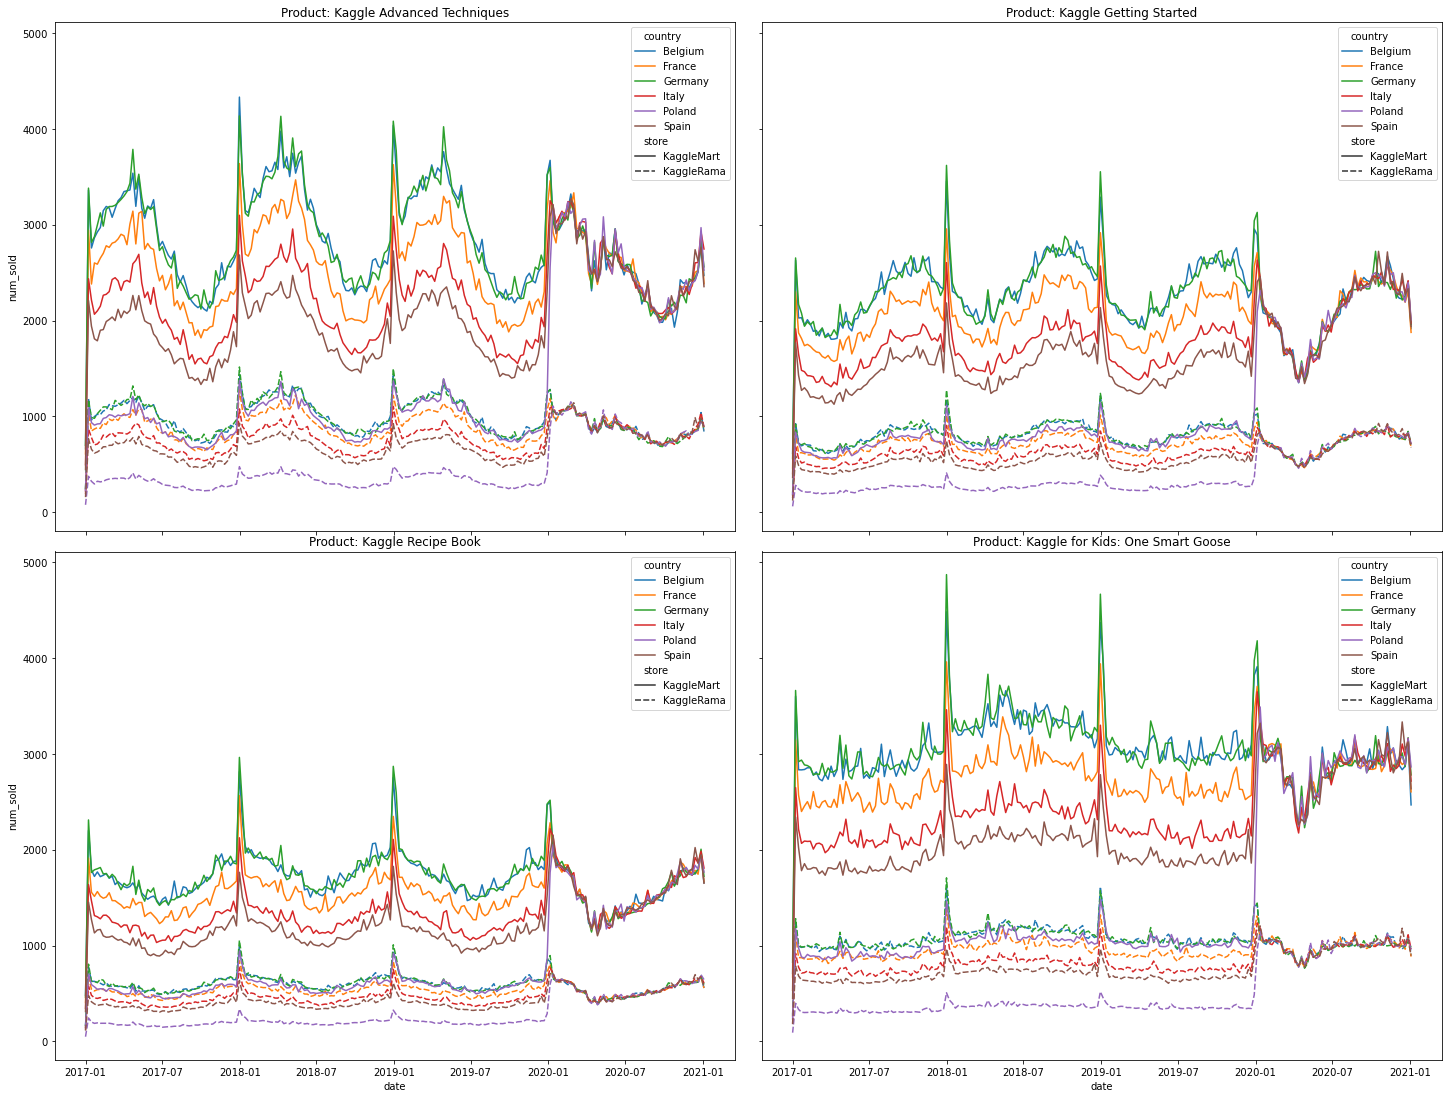

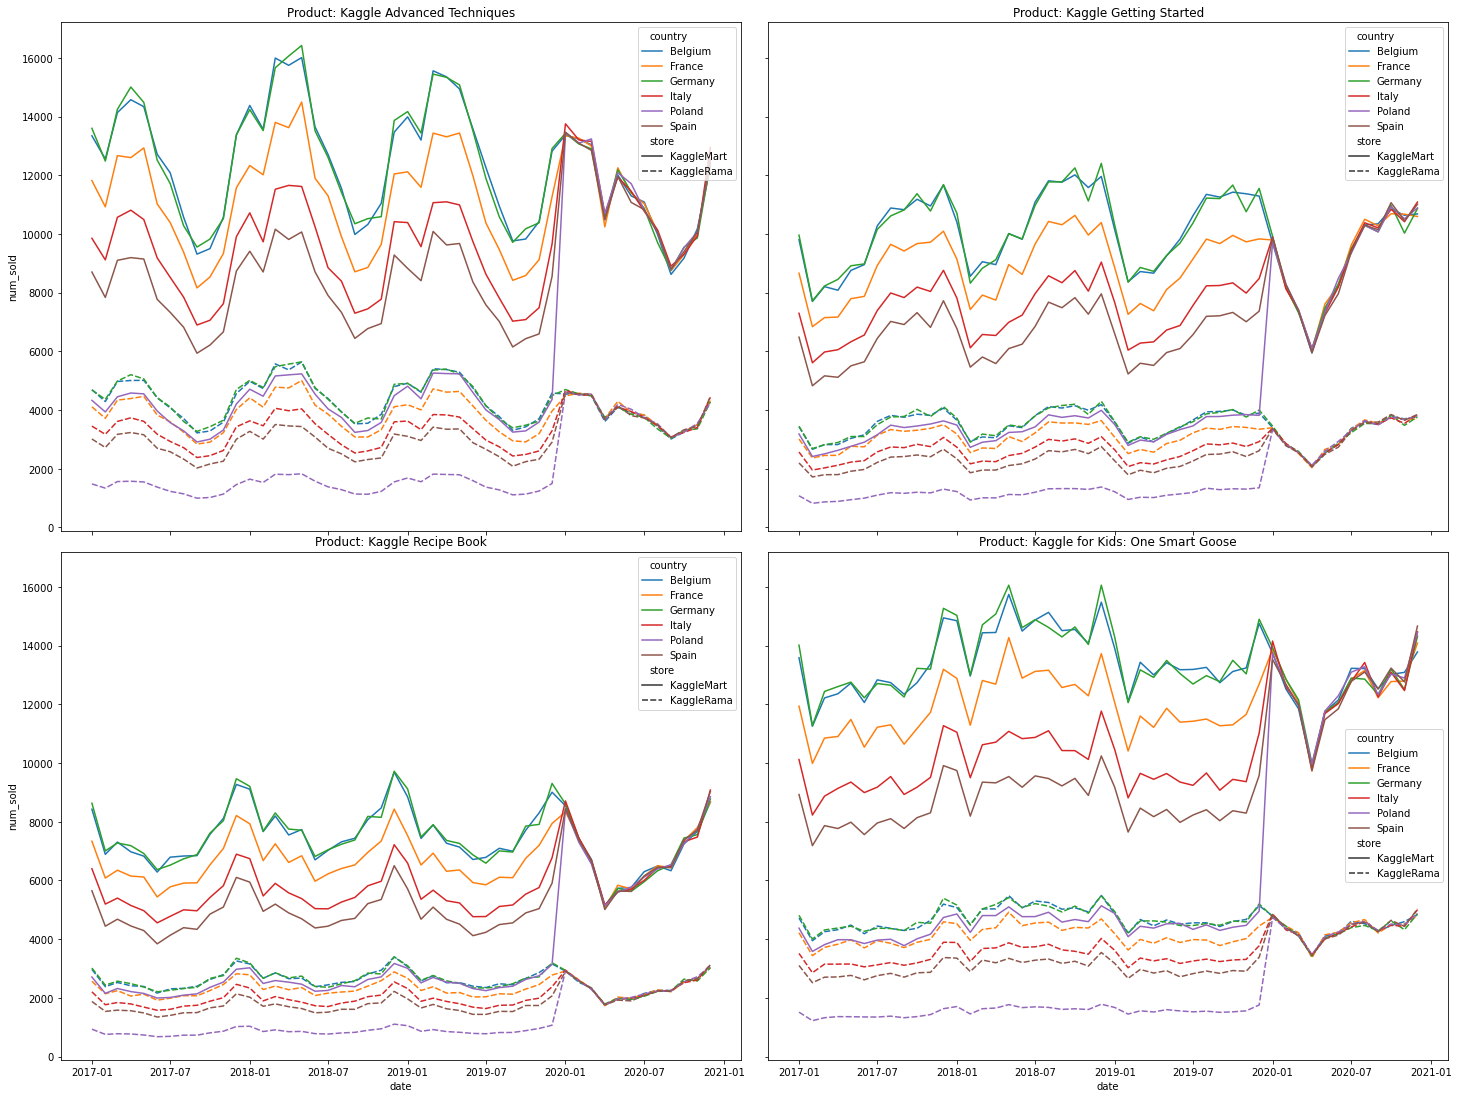

In [42]:
plot_all(weekly_df)
plot_all(monthly_df)

In [69]:
store_weights = train_df.groupby("store")["num_sold"].sum()/train_df["num_sold"].sum()
store_weights

store
KaggleMart    0.742515
KaggleRama    0.257485
Name: num_sold, dtype: float64

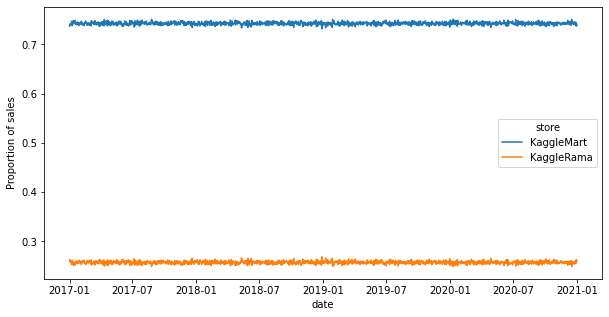

In [60]:
store_ratio_over_time = (train_df.groupby(["date","store"])["num_sold"].sum() / train_df.groupby(["date"])["num_sold"].sum()).reset_index()
f,ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = store_ratio_over_time, x="date", y="num_sold", hue="store");
ax.set_ylabel("Proportion of sales");

In [61]:
def plot_adjusted_store(df):
    new_df = df.copy()
    weights = store_weights.loc["KaggleMart"] / store_weights
    for store in weights.index:
        new_df.loc[new_df["store"] == store, "num_sold"] = new_df.loc[new_df["store"] == store, "num_sold"] * weights[store]
    plot_all(new_df)

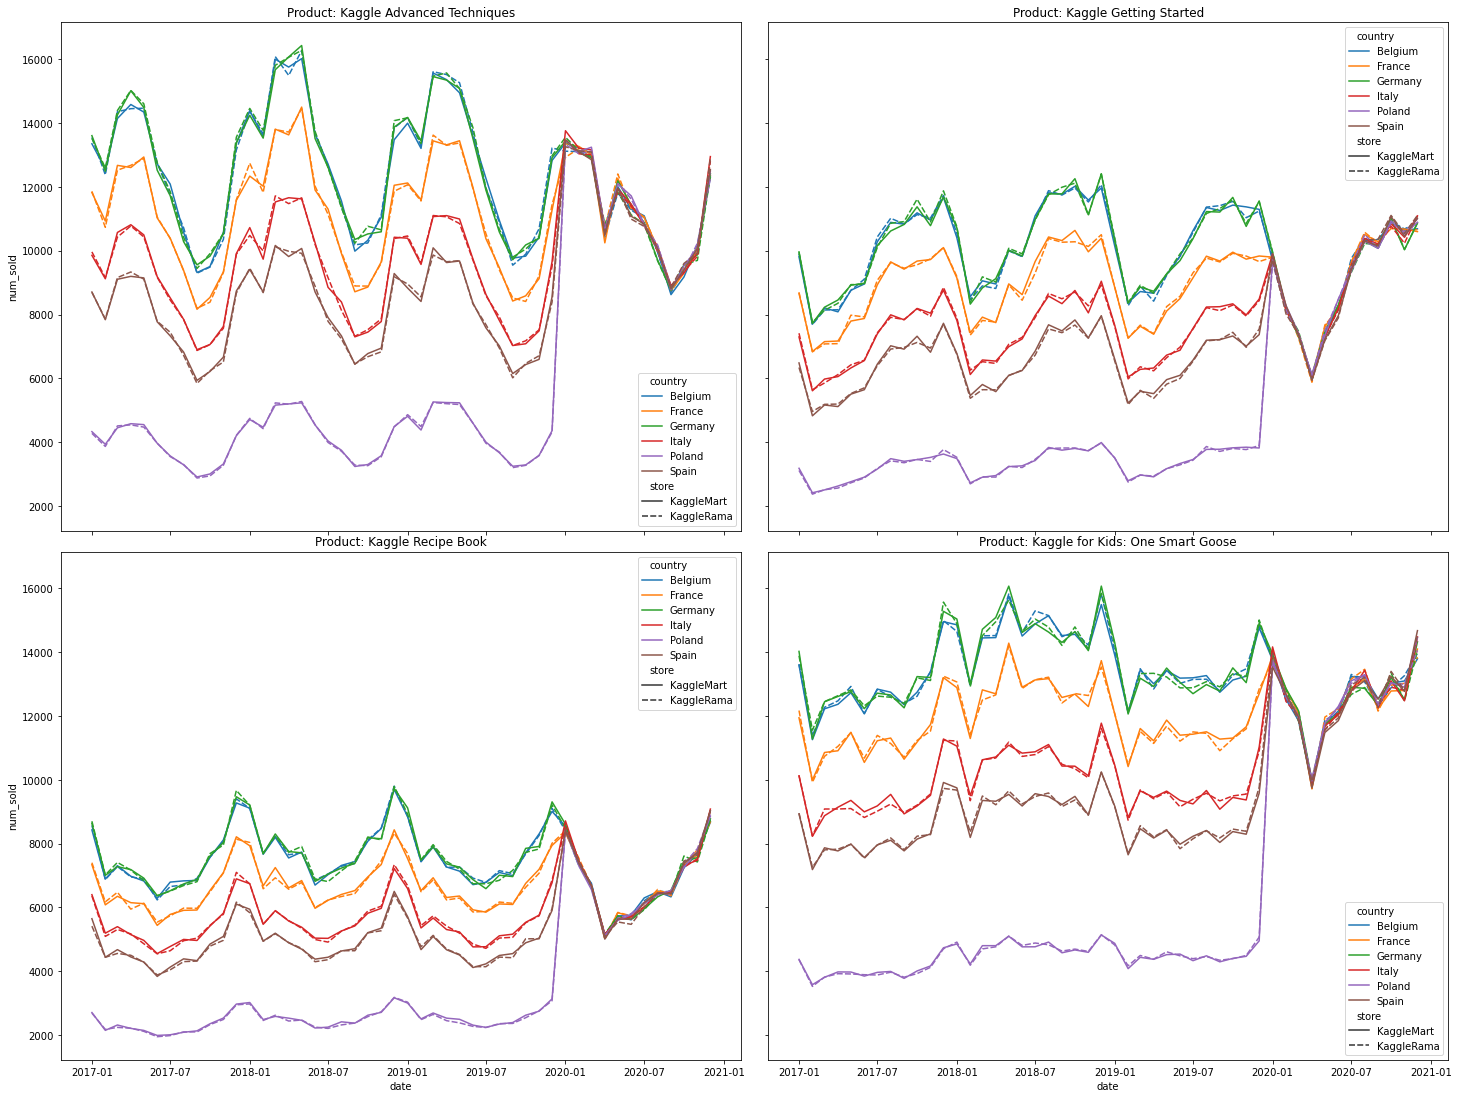

In [70]:
plot_adjusted_store(monthly_df)

In [76]:
country_weights = train_df.loc[train_df["date"] < "2020-01-01"].groupby("country")["num_sold"].sum()/train_df.loc[train_df["date"] < "2020-01-01", "num_sold"].sum()
country_weights

country
Belgium    0.218930
France     0.191360
Germany    0.219586
Italy      0.159383
Poland     0.071348
Spain      0.139393
Name: num_sold, dtype: float64

date  country  num_sold
0    2017-01-01  Belgium  0.216258
1    2017-01-01   France  0.191441
2    2017-01-01  Germany  0.223880
3    2017-01-01    Italy  0.158351
4    2017-01-01   Poland  0.069958
...         ...      ...       ...
8761 2020-12-31   France  0.159591
8762 2020-12-31  Germany  0.172803
8763 2020-12-31    Italy  0.178028
8764 2020-12-31   Poland  0.172744
8765 2020-12-31    Spain  0.159474

[8766 rows x 3 columns]

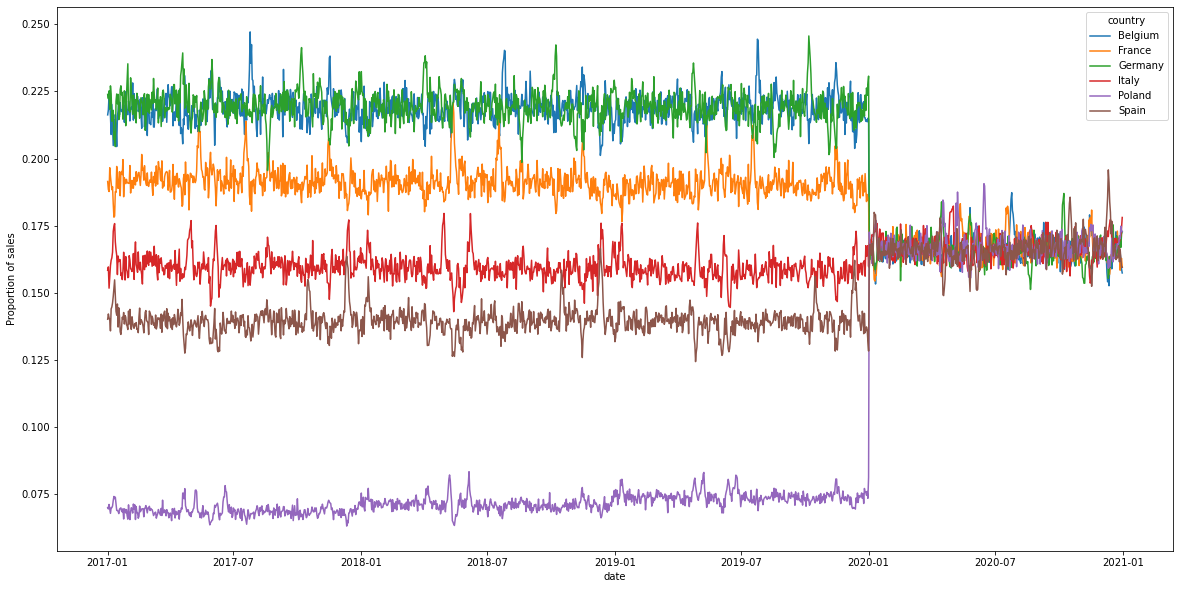

In [79]:
country_ratio_over_time = (train_df.groupby(["date","country"])["num_sold"].sum() / train_df.groupby(["date"])["num_sold"].sum()).reset_index()
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = country_ratio_over_time, x="date", y="num_sold", hue="country");
ax.set_ylabel("Proportion of sales");
country_ratio_over_time

In [82]:
def plot_adjust_country(df):
    new_df = df.copy()
    
    weights = country_weights.loc["Belgium"] / country_weights
    
    for country in weights.index:
        new_df.loc[(new_df["country"] == country) & (new_df["date"] < "2020-01-01"), "num_sold"] = new_df.loc[(new_df["country"] == country) & (new_df["date"] < "2020-01-01"), "num_sold"] *  weights[country]
    plot_all(new_df)

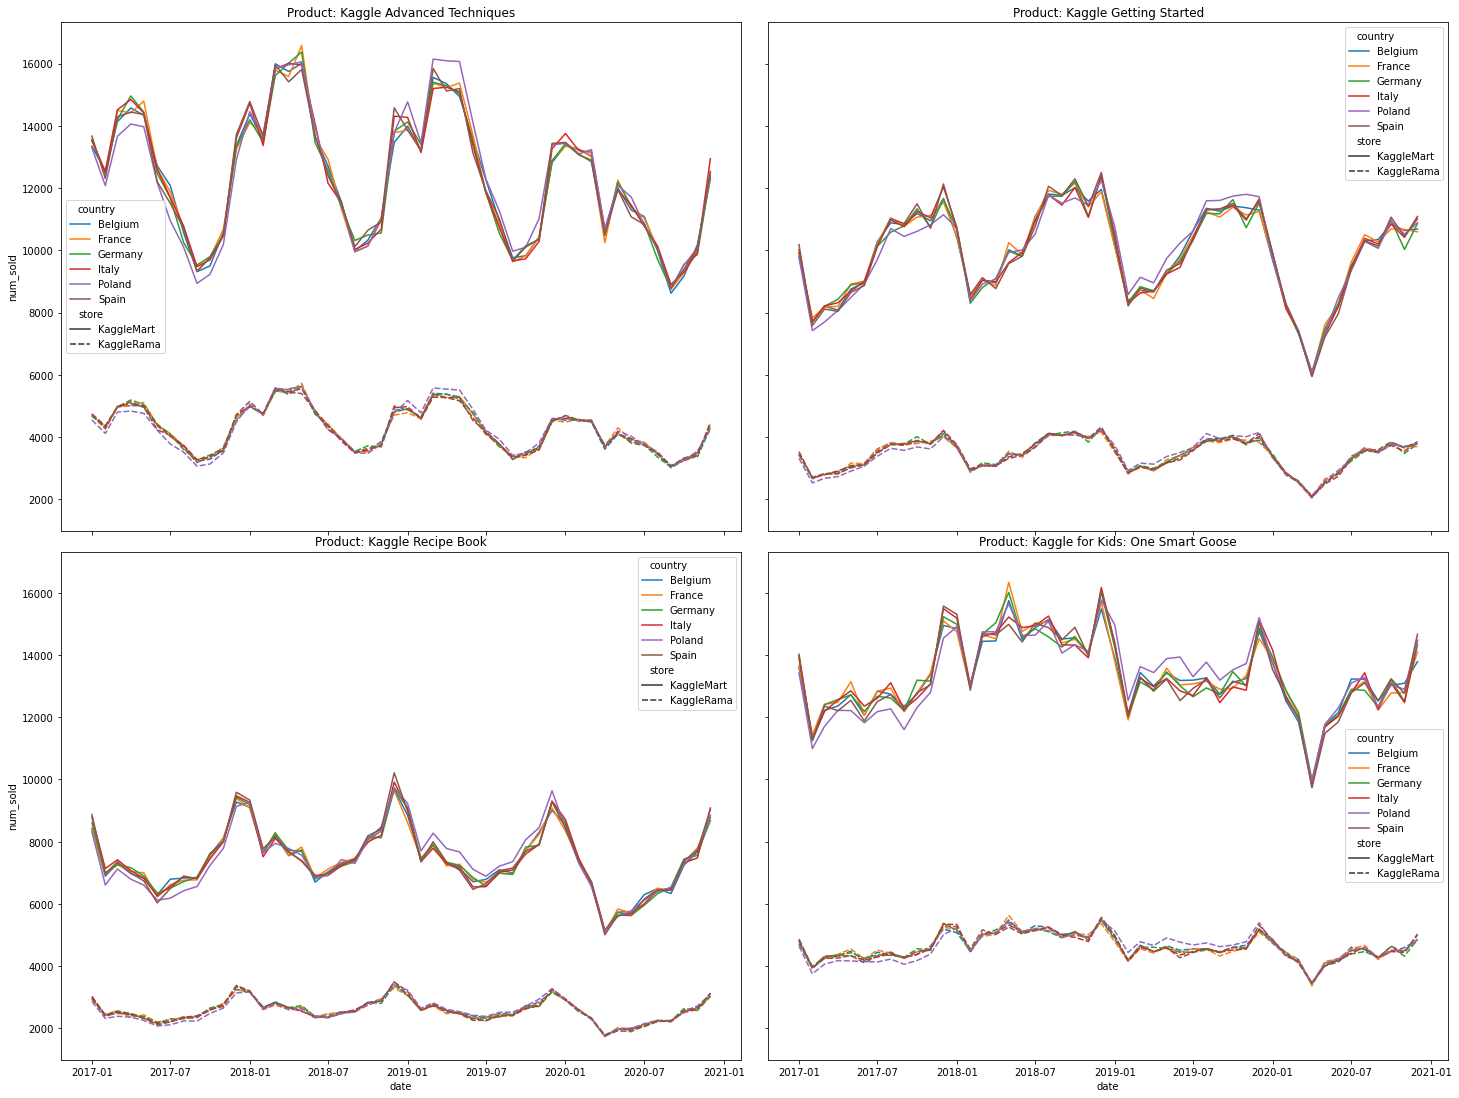

In [83]:
plot_adjust_country(monthly_df)

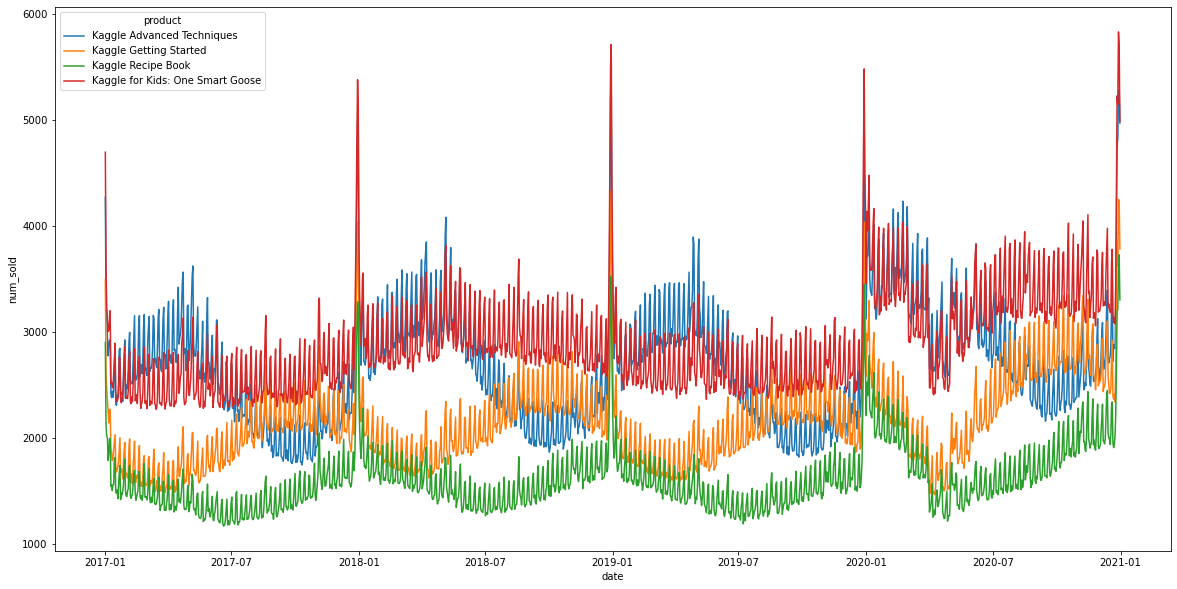

In [85]:
product_df = train_df.groupby(["date","product"])["num_sold"].sum().reset_index()
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=product_df, x="date", y="num_sold", hue="product");

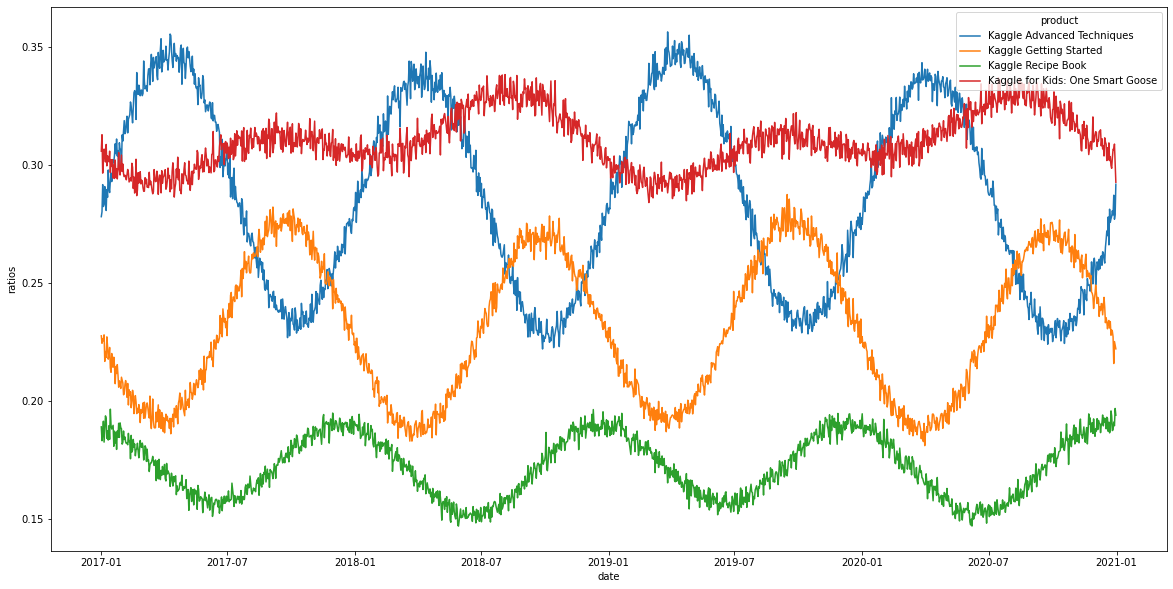

In [89]:
product_ratio_df = product_df.pivot(index="date", columns="product", values="num_sold")
product_ratio_df = product_ratio_df.apply(lambda x: x/x.sum(),axis=1)
product_ratio_df = product_ratio_df.stack().rename("ratios").reset_index()
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = product_ratio_df, x="date", y="ratios", hue="product");

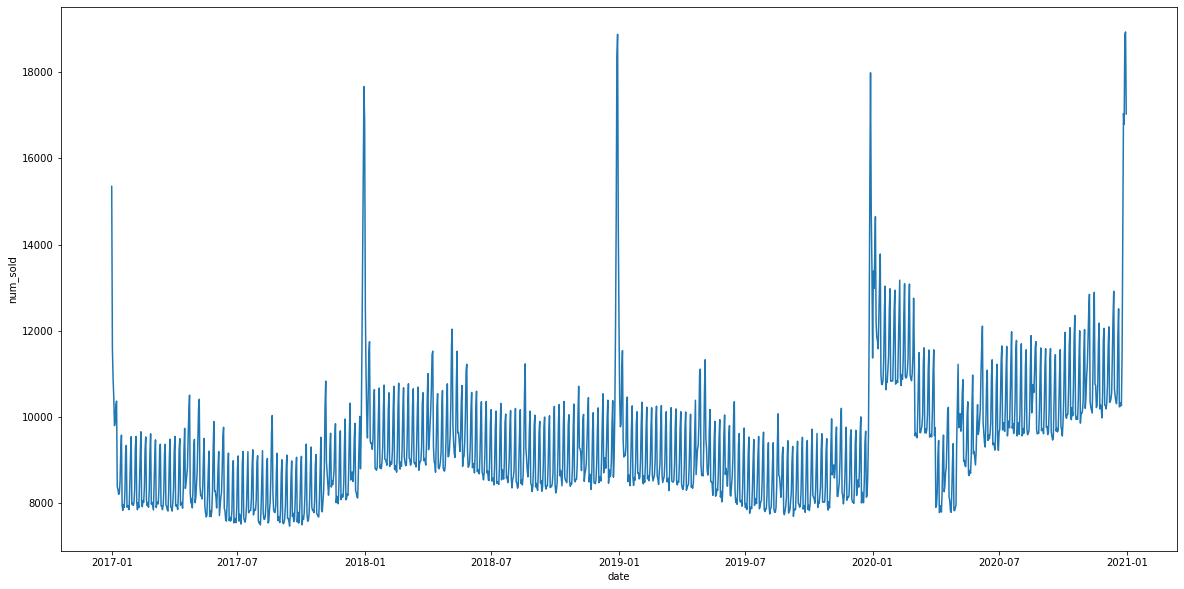

In [92]:
train_df = train_df.groupby(["date"])["num_sold"].sum().reset_index()
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = train_df, x="date", y="num_sold");

In [95]:
weekly_df = train_df.groupby([pd.Grouper(key="date", freq="W")])["num_sold"].sum().rename("num_sold").reset_index()
monthly_df = train_df.groupby([pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()

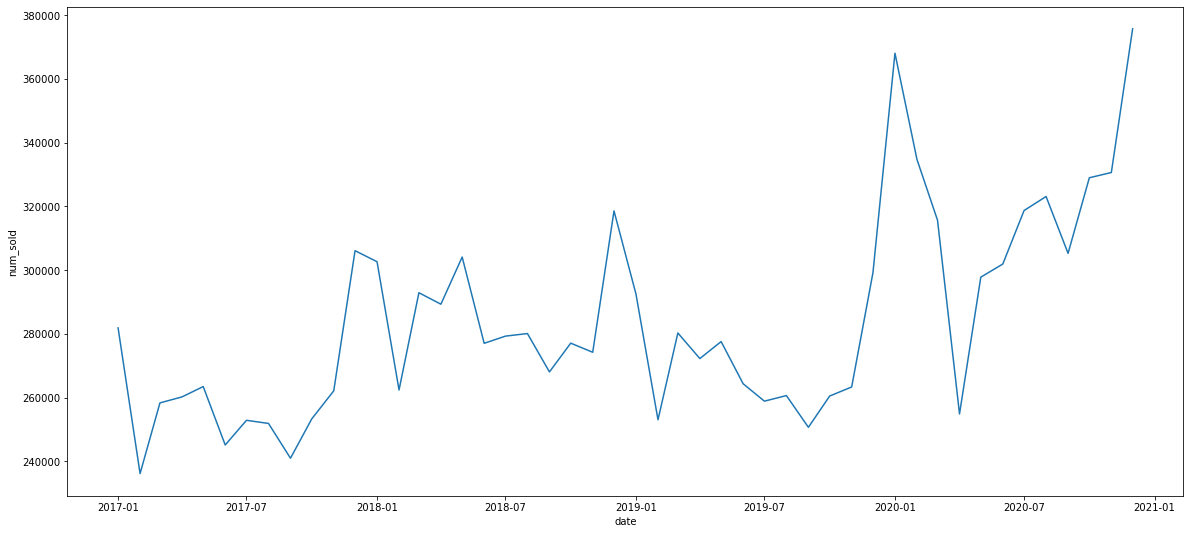

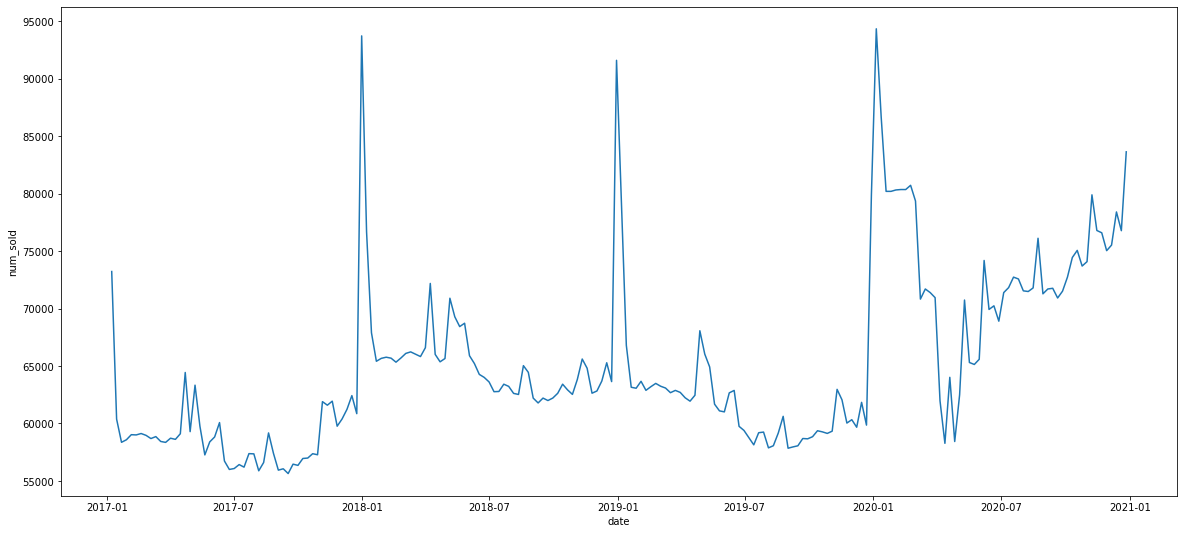

In [96]:
f,ax = plt.subplots(figsize=(20,9))
sns.lineplot(data=monthly_df, x="date", y="num_sold");
f,ax = plt.subplots(figsize=(20,9))
sns.lineplot(data=weekly_df[1:-1], x="date", y="num_sold");

In [97]:
def plot_seasonality(df, x_axis):
    
    #remove the leap year date
    df = df.loc[df["date"] != "2020-02-29"].copy()

    df["month"] = df["date"].dt.month
    df["day_of_week"] = df["date"].dt.dayofweek
    df["day_of_year"] = df["date"].dt.dayofyear
    #account for leap year
    df["day_of_year"] = df.apply(lambda x: x["day_of_year"]-1 if x["date"] > pd.Timestamp("2020-02-29") else x["day_of_year"], axis=1)
        
    df_no_2020 = df.loc[df["date"] < "2020-01-01"]

    f,axes = plt.subplots(2,1,figsize=(20,16))
    sns.lineplot(data=df, x=x_axis, y="num_sold", ax=axes[0]);
    sns.lineplot(data=df_no_2020, x=x_axis, y="num_sold", ax=axes[1]);
    axes[0].set_title("{} Seasonality - all years".format(x_axis))
    axes[1].set_title("{} Seasonality - not including 2020".format(x_axis))

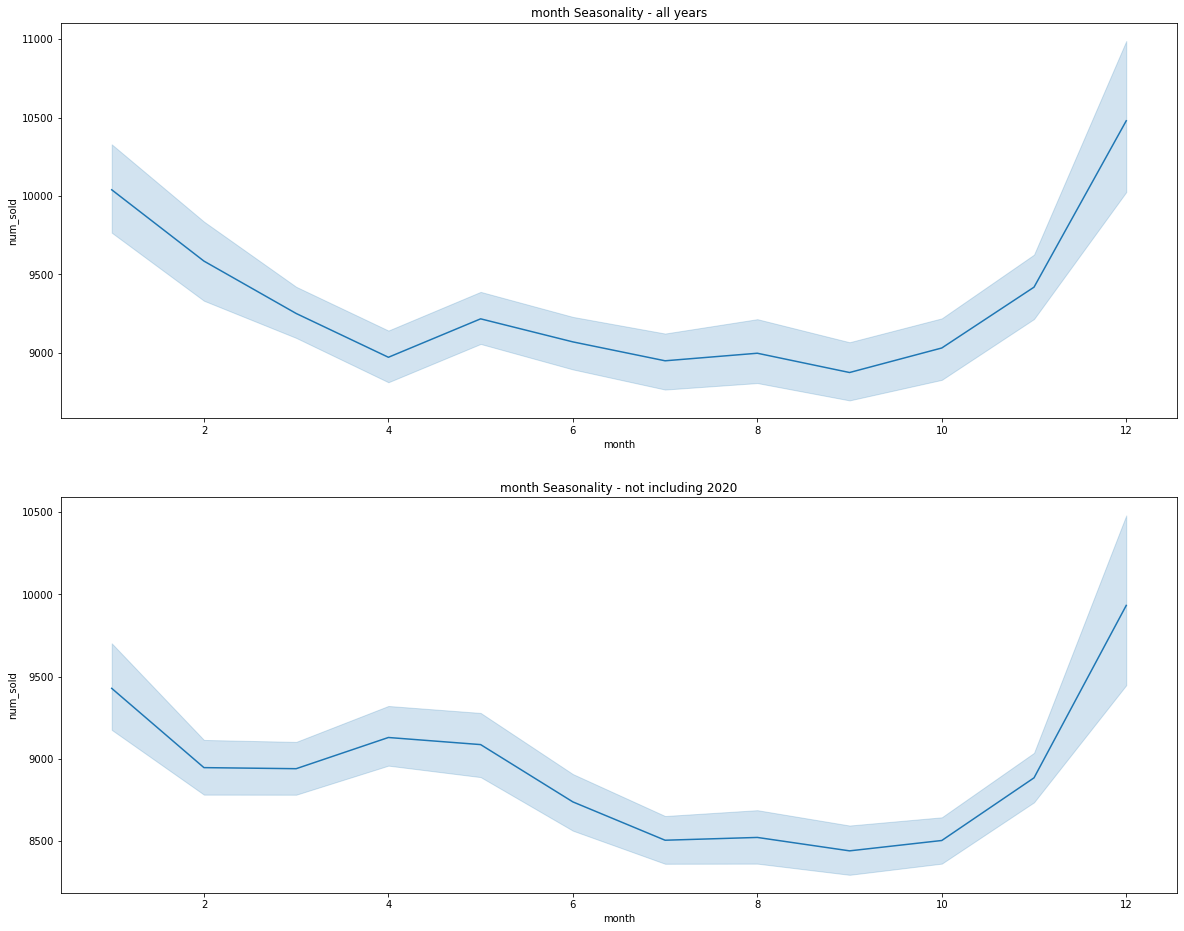

In [98]:
plot_seasonality(train_df, "month")

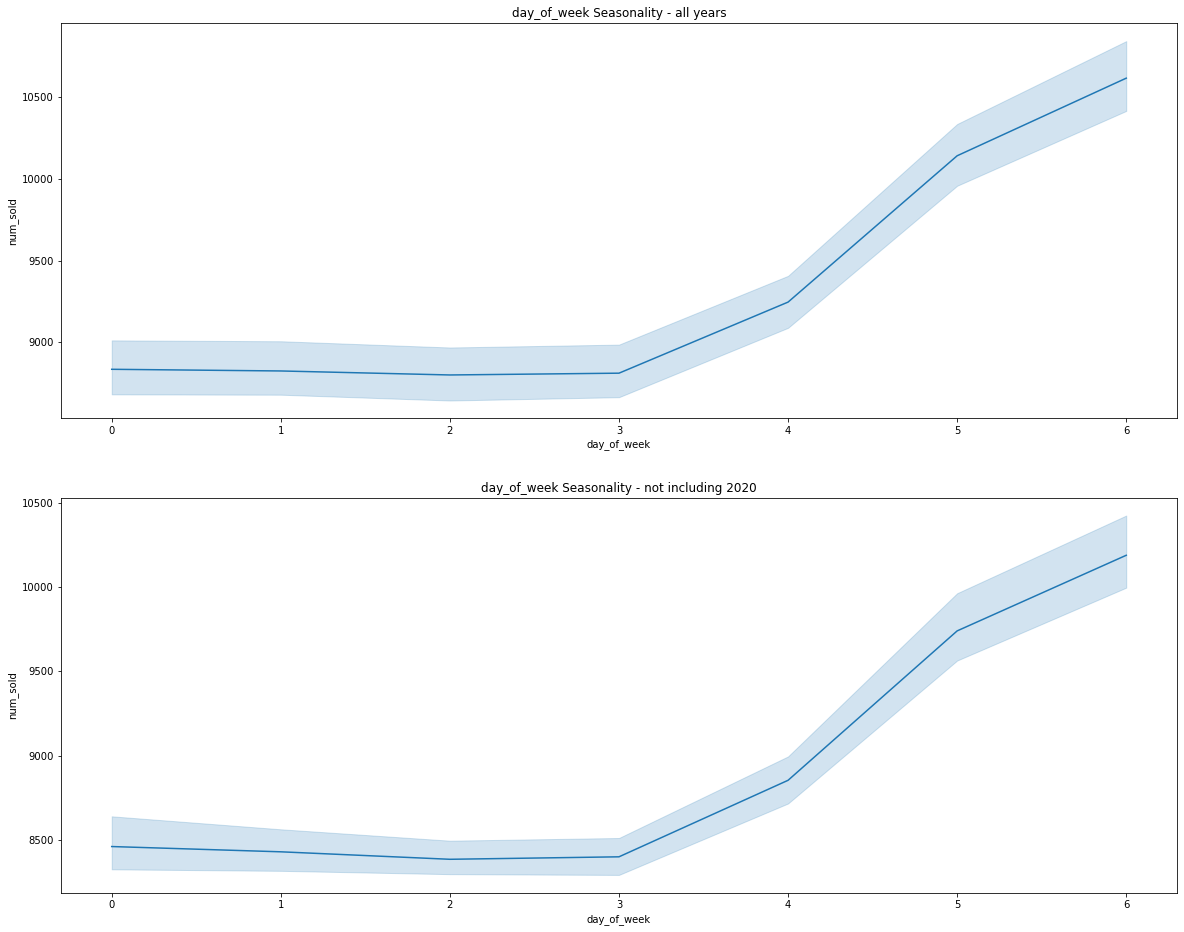

In [99]:
plot_seasonality(train_df, "day_of_week")

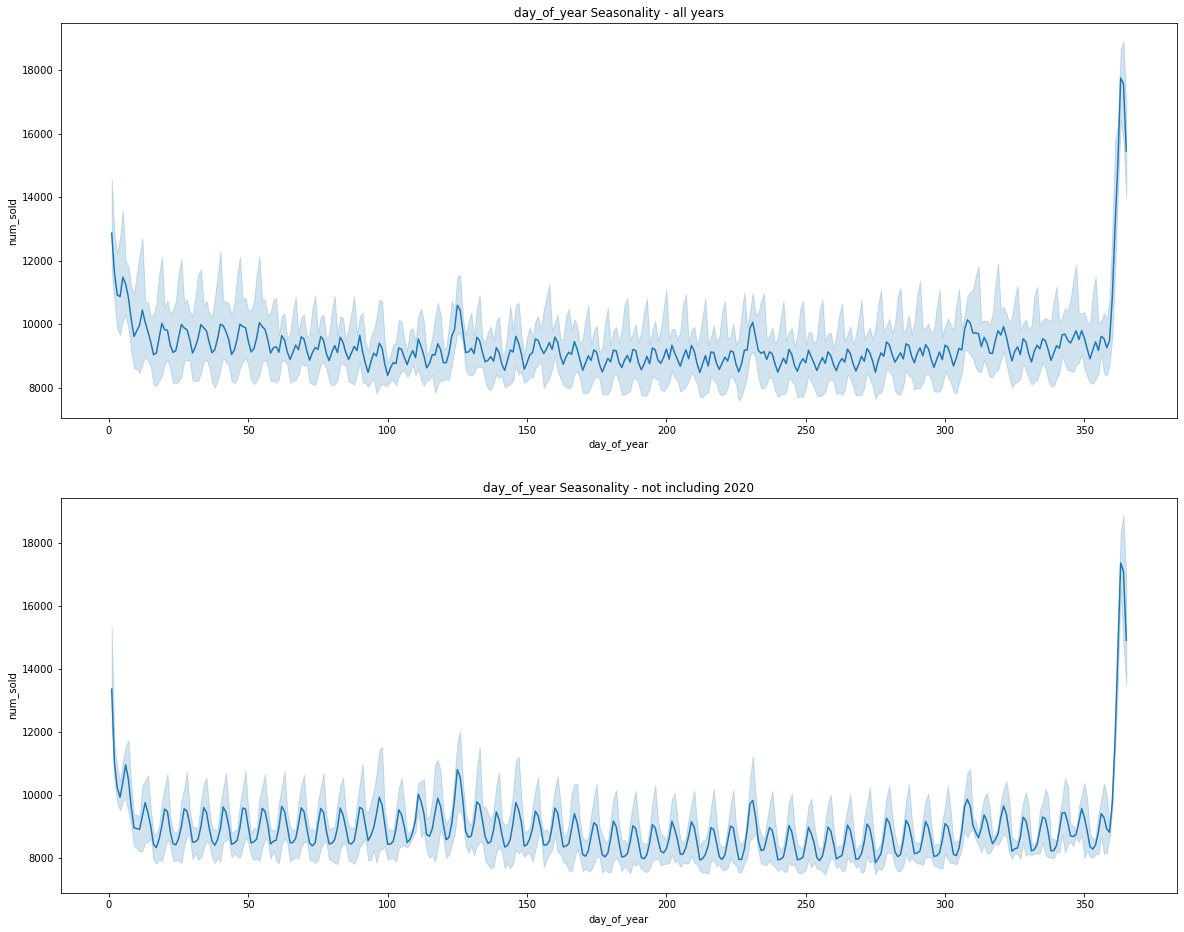

In [101]:
plot_seasonality(train_df, "day_of_year")

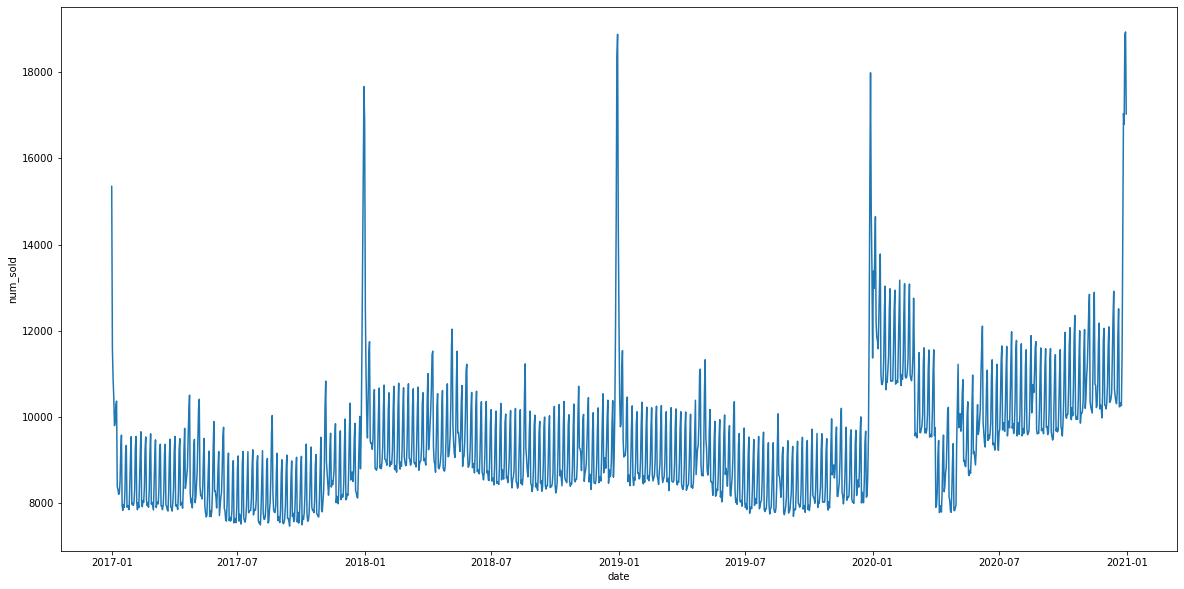

In [102]:
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = train_df, x="date", y="num_sold");

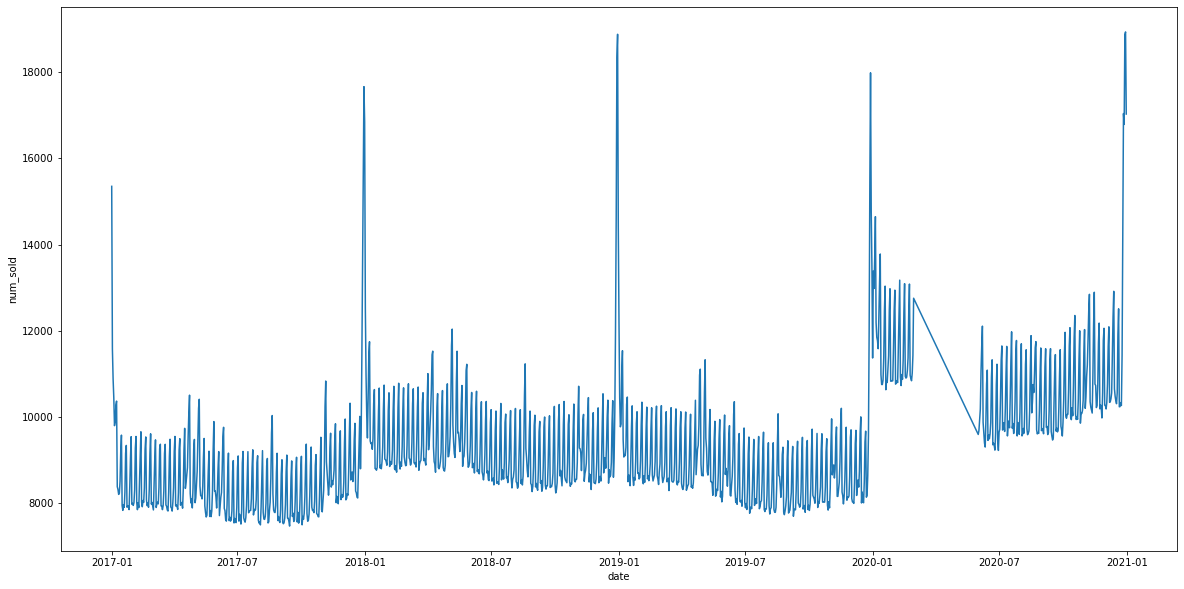

In [103]:
train_nocovid_df = train_df.loc[~((train_df["date"] >= "2020-03-01") & (train_df["date"] < "2020-06-01"))]
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = train_nocovid_df, x="date", y="num_sold");

In [122]:
#get the dates to forecast for
test_total_sales_df = test_df.groupby(["date"])["row_id"].first().reset_index().drop(columns="row_id")
#keep dates for later
test_total_sales_dates = test_total_sales_df[["date"]]

In [114]:
def feature_engineer(df):
    new_df = df.copy()
    new_df["month"] = df["date"].dt.month
    new_df["month_sin"] = np.sin(new_df['month'] * (2 * np.pi / 12))
    new_df["month_cos"] = np.cos(new_df['month'] * (2 * np.pi / 12))
    
    
    new_df["day_of_week"] = df["date"].dt.dayofweek
    new_df["day_of_week"] = new_df["day_of_week"].apply(lambda x: 0 if x<=3 else(1 if x==4 else (2 if x==5 else (3))))
    
    new_df["day_of_year"] = df["date"].dt.dayofyear
    #account for leap year
    new_df["day_of_year"] = new_df.apply(lambda x: x["day_of_year"]-1 if (x["date"] > pd.Timestamp("2020-02-29") and x["date"] < pd.Timestamp("2021-01-01"))  else x["day_of_year"], axis=1)
    new_df["important_dates"] = new_df["day_of_year"].apply(lambda x: x if x in [1,2,3,4,5,6,7,8,125,126,360,361,362,363,364,365] else 0)
    
    
    new_df["year"] = df["date"].dt.year
    new_df = new_df.drop(columns=["date","month","day_of_year"])
    
    new_df = pd.get_dummies(new_df, columns = ["important_dates","day_of_week"], drop_first=True)
    
    return new_df

In [123]:
train_total_sales_df = feature_engineer(train_nocovid_df)
test_total_sales_df = feature_engineer(test_total_sales_df)

In [124]:
y = train_total_sales_df["num_sold"]
X = train_total_sales_df.drop(columns="num_sold")
X_test = test_total_sales_df

In [125]:
model = Ridge(tol=1e-2, max_iter=1000000, random_state=0)
model.fit(X, y)
preds = model.predict(X_test)
test_total_sales_dates["num_sold"] = preds

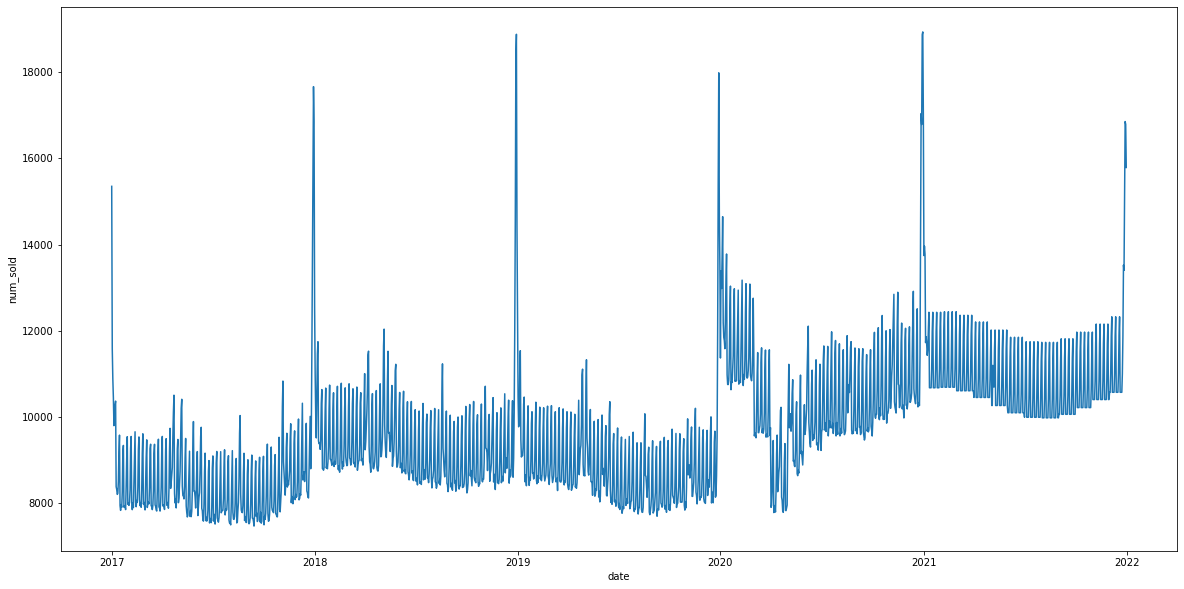

In [126]:
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = pd.concat([train_df,test_total_sales_dates]).reset_index(drop=True), x="date", y="num_sold");

In [128]:
product_ratio_2019 = product_ratio_df.loc[product_ratio_df["date"].dt.year == 2019].copy()
product_ratio_2019["mm-dd"] = product_ratio_2019["date"].dt.strftime('%m-%d')
product_ratio_2019 = product_ratio_2019.drop(columns="date")

test_product_ratio_df = test_df.copy()
test_product_ratio_df["mm-dd"] = test_product_ratio_df["date"].dt.strftime('%m-%d')

test_product_ratio_df = pd.merge(test_product_ratio_df,product_ratio_2019, how="left", on = ["mm-dd","product"])
test_product_ratio_df

row_id       date  country       store  \
0       70128 2021-01-01  Belgium  KaggleMart   
1       70129 2021-01-01  Belgium  KaggleMart   
2       70130 2021-01-01  Belgium  KaggleMart   
3       70131 2021-01-01  Belgium  KaggleMart   
4       70132 2021-01-01  Belgium  KaggleRama   
...       ...        ...      ...         ...   
17515   87643 2021-12-31    Spain  KaggleMart   
17516   87644 2021-12-31    Spain  KaggleRama   
17517   87645 2021-12-31    Spain  KaggleRama   
17518   87646 2021-12-31    Spain  KaggleRama   
17519   87647 2021-12-31    Spain  KaggleRama   

                                product  mm-dd    ratios  
0            Kaggle Advanced Techniques  01-01  0.279273  
1                Kaggle Getting Started  01-01  0.230832  
2                    Kaggle Recipe Book  01-01  0.188119  
3      Kaggle for Kids: One Smart Goose  01-01  0.301776  
4            Kaggle Advanced Techniques  01-01  0.279273  
...                                 ...    ...       ...  
17515  Kaggle for Kids: One Smart Goose  12-31  0.306473  
17516        Kaggle Advanced Techniques  12-31  0.277440  
17517            Kaggle Getting Started  12-31  0.224633  
17518                Kaggle Recipe Book  12-31  0.191453  
17519  Kaggle for Kids: One Smart Goose  12-31  0.306473  

[17520 rows x 7 columns]

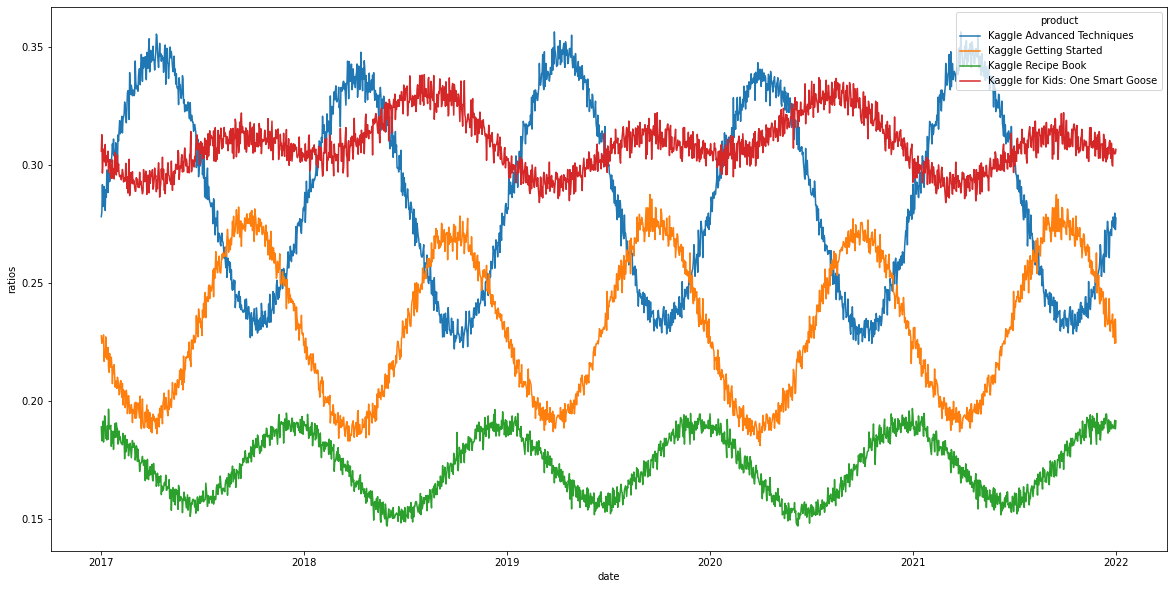

In [129]:
temp_df = pd.concat([product_ratio_df,test_product_ratio_df]).reset_index(drop=True)
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=temp_df, x="date", y="ratios", hue="product");

In [130]:
test_sub_df = pd.merge(test_df, test_total_sales_dates, how="left")
test_sub_df["ratios"] = test_product_ratio_df["ratios"]
test_sub_df

row_id       date  country       store  \
0       70128 2021-01-01  Belgium  KaggleMart   
1       70129 2021-01-01  Belgium  KaggleMart   
2       70130 2021-01-01  Belgium  KaggleMart   
3       70131 2021-01-01  Belgium  KaggleMart   
4       70132 2021-01-01  Belgium  KaggleRama   
...       ...        ...      ...         ...   
17515   87643 2021-12-31    Spain  KaggleMart   
17516   87644 2021-12-31    Spain  KaggleRama   
17517   87645 2021-12-31    Spain  KaggleRama   
17518   87646 2021-12-31    Spain  KaggleRama   
17519   87647 2021-12-31    Spain  KaggleRama   

                                product      num_sold    ratios  
0            Kaggle Advanced Techniques  13744.616925  0.279273  
1                Kaggle Getting Started  13744.616925  0.230832  
2                    Kaggle Recipe Book  13744.616925  0.188119  
3      Kaggle for Kids: One Smart Goose  13744.616925  0.301776  
4            Kaggle Advanced Techniques  13744.616925  0.279273  
...                                 ...           ...       ...  
17515  Kaggle for Kids: One Smart Goose  15789.844965  0.306473  
17516        Kaggle Advanced Techniques  15789.844965  0.277440  
17517            Kaggle Getting Started  15789.844965  0.224633  
17518                Kaggle Recipe Book  15789.844965  0.191453  
17519  Kaggle for Kids: One Smart Goose  15789.844965  0.306473  

[17520 rows x 7 columns]

In [132]:
def disaggregate_forecast(df):
    new_df = df.copy()
    
    stores_weights = original_train_df.groupby("store")["num_sold"].sum()/original_train_df["num_sold"].sum()
    country_weights = pd.Series(index = test_sub_df["country"].unique(),data = 1/6)

    for country in country_weights.index:
        new_df.loc[(new_df["country"] == country), "num_sold"] = new_df.loc[(new_df["country"] == country), "num_sold"] *  country_weights[country]
        
    for store in store_weights.index:
        new_df.loc[new_df["store"] == store, "num_sold"] = new_df.loc[new_df["store"] == store, "num_sold"] * store_weights[store]
    
    #apply product weights (which is dependent on date)
    new_df["num_sold"] = new_df["num_sold"] * new_df["ratios"]
    new_df["num_sold"] = new_df["num_sold"].round()
    new_df = new_df.drop(columns=["ratios"])
    
    return new_df

In [136]:
final_df = disaggregate_forecast(test_sub_df)
final_df

row_id       date  country       store  \
0       70128 2021-01-01  Belgium  KaggleMart   
1       70129 2021-01-01  Belgium  KaggleMart   
2       70130 2021-01-01  Belgium  KaggleMart   
3       70131 2021-01-01  Belgium  KaggleMart   
4       70132 2021-01-01  Belgium  KaggleRama   
...       ...        ...      ...         ...   
17515   87643 2021-12-31    Spain  KaggleMart   
17516   87644 2021-12-31    Spain  KaggleRama   
17517   87645 2021-12-31    Spain  KaggleRama   
17518   87646 2021-12-31    Spain  KaggleRama   
17519   87647 2021-12-31    Spain  KaggleRama   

                                product  num_sold  
0            Kaggle Advanced Techniques     475.0  
1                Kaggle Getting Started     393.0  
2                    Kaggle Recipe Book     320.0  
3      Kaggle for Kids: One Smart Goose     513.0  
4            Kaggle Advanced Techniques     165.0  
...                                 ...       ...  
17515  Kaggle for Kids: One Smart Goose     599.0  
17516        Kaggle Advanced Techniques     188.0  
17517            Kaggle Getting Started     152.0  
17518                Kaggle Recipe Book     130.0  
17519  Kaggle for Kids: One Smart Goose     208.0  

[17520 rows x 6 columns]

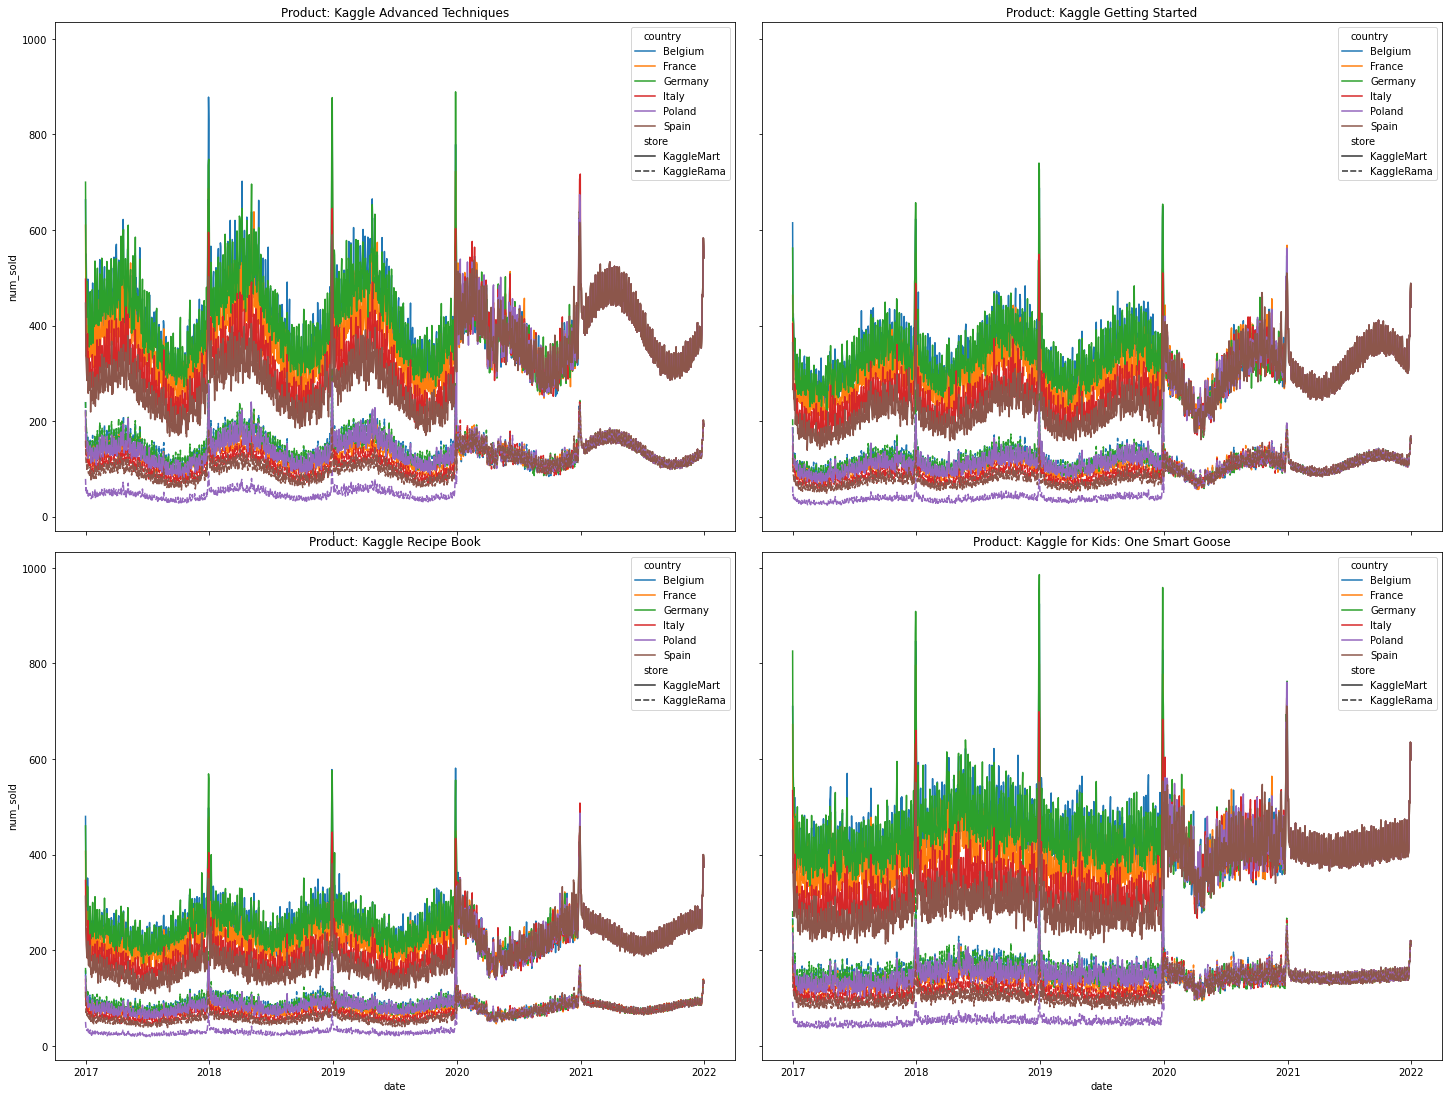

In [137]:
plot_all(pd.concat([original_train_df,final_df]).reset_index(drop=True))

In [138]:
submission = pd.read_csv("sample_submission.csv")
submission["num_sold"] = final_df["num_sold"]
submission.to_csv('Subm2.csv', index = False)

In [142]:
model = LinearRegression()
model.fit(X, y)
preds = model.predict(X_test)
test_total_sales_dates["num_sold"] = preds
final_df = disaggregate_forecast(test_sub_df)
submission = pd.read_csv("sample_submission.csv")
submission["num_sold"] = final_df["num_sold"]
submission.to_csv('Subm3.csv', index = False)

In [144]:
model = BayesianRidge()
model.fit(X, y)
preds = model.predict(X_test)
test_total_sales_dates["num_sold"] = preds
final_df = disaggregate_forecast(test_sub_df)
submission = pd.read_csv("sample_submission.csv")
submission["num_sold"] = final_df["num_sold"]
submission.to_csv('Subm4.csv', index = False)